# Acceptance map that "ruins" GENIE samples to mimic the detector

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [18]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/quasidata/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

_,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [5]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
overlay_scalings = dict()
f_Cosmic=0.8658
overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.866': {   '1mu-1p': 0.03578088045074869,
                                             'CC 1p 0pi': 0.03578088045074869,
                                             'N(Ovelay)/N(On)': 7.667022982362373,
                                             'cosmic': 0.22106943595880704,
                                             'other pairs': 0.03578088045074868}}
applied cuts to overlay
applied cuts to data


In [6]:
overlay_scaling = overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]

In [7]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


In [8]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


In [9]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'

926088  GENIE interaction
243732 GENIE CC1p0π events


In [12]:
mA_array = [0.6,0.7,0.8,0.9,0.95,0.99,1.05,1.1,1.2,1.3,1.4] # S.Dytman: GENIE assumes mA=0.99 GeV/c2 (Dec-30,2017)

genie_CC1p0pi = dict()
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

28507 CC1p0π events in GENIE samples with mA=0.60
30599 CC1p0π events in GENIE samples with mA=0.70
32163 CC1p0π events in GENIE samples with mA=0.80
33824 CC1p0π events in GENIE samples with mA=0.90
34543 CC1p0π events in GENIE samples with mA=0.95
34849 CC1p0π events in GENIE samples with mA=0.99
35749 CC1p0π events in GENIE samples with mA=1.05
36196 CC1p0π events in GENIE samples with mA=1.10
37239 CC1p0π events in GENIE samples with mA=1.20
38042 CC1p0π events in GENIE samples with mA=1.30
38810 CC1p0π events in GENIE samples with mA=1.40


# Lets first check what happens when we apply our method on a GENIE sample

In [96]:
from scipy import stats

In [128]:
Nrand = 34000
quasidata_events = genie_CC1p0pi[0.99].sample(n=Nrand)
Pp_cut = (0.2,1.0)
quasidata_in_cut = quasidata_events[(quasidata_events['Pp'] > Pp_cut[0])
                                    &(quasidata_events['Pp'] < Pp_cut[1])]
LL_df = pd.DataFrame(columns={'mA','LL'})
pdf_dict=dict()
scipy_pdf_dict=dict()
for mA in mA_array:
    var_array = np.array(genie_CC1p0pi[mA]['Pp'])
#     weights = np.array(genie_CC1p0pi[mA]['MicroBooNEWeight_Pmu_theta_Pp_theta'])
    # without acceptacne weights
    pdf = gaussian_kde(var_array)#,weights=weights)
    pdf_dict[mA]=pdf
    
    scipy_pdf = stats.gaussian_kde(var_array, bw_method=0.005)
    scipy_pdf_dict[mA]=scipy_pdf

    Pp_array = np.array(quasidata_in_cut['Pp'])
    f = np.array([np.max([0.001,scipy_pdf([Pp])]) for Pp in Pp_array])
    LL = np.sum(np.log(f))
    print 'np.min(f):',np.min(f)
    LL_df = LL_df.append(pd.DataFrame({'mA':mA,'LL':LL},index=[mA]))    
print 'done LL calculation'


np.min(f): 0.259179675649
np.min(f): 0.255479840572
np.min(f): 0.260994409581
np.min(f): 0.26719667167
np.min(f): 0.281133904511
np.min(f): 0.330271957865
np.min(f): 0.351652308427
np.min(f): 0.280540569761
np.min(f): 0.330696662668
np.min(f): 0.365599180176
np.min(f): 0.418400631004
done LL calculation


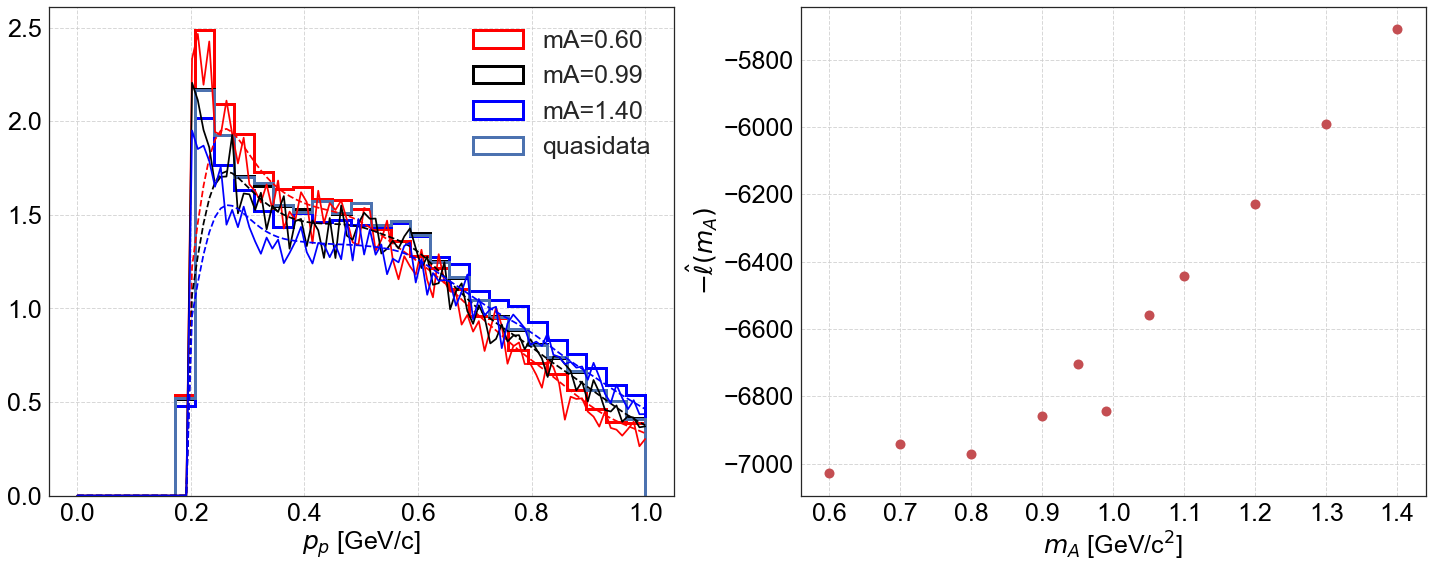

In [129]:

fig=plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
for mA,color in zip([0.6,0.99,1.4],['red','black','blue']):
    plt.hist(genie_CC1p0pi[mA]['Pp'],bins=linspace(0,1,30),histtype='step',color=color,linewidth=3,label='mA=%.2f'%mA,normed=1)
    x_pdf = linspace(0,1,100)
    plt.plot(x_pdf,pdf_dict[mA](x_pdf),'--',color=color)
    plt.plot(x_pdf,scipy_pdf_dict[mA](x_pdf),'-',color=color)


plt.hist(quasidata_in_cut['Pp'],bins=linspace(0,1,30),histtype='step',linewidth=3,label='quasidata',normed=1)
set_axes(ax,r'$p_p$ [GeV/c]','',do_add_grid=True,do_add_legend=True)

ax = fig.add_subplot(1,2,2)
x,y = LL_df['mA'] , -LL_df['LL']
# deg = 2 # degree of polynomial
# p,cov = np.polyfit(x,y,deg=deg,cov=True)
# poly = np.poly1d(p)    

plt.plot( x,y , 'ro',markersize=10,linewidth=2,label='LL(data|genie)')
# x_poly = linspace(0.6,1.4,100)
# plt.plot(x_poly,poly(x_poly),'-',color='royalblue',label='polynomial fit')    

# # Matrix with rows 1, t, t**2, ...:
# TT = np.vstack([x_poly**(deg-i) for i in range(deg+1)]).T
# Cov_poly = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
# sig_poly = np.sqrt(np.diag(Cov_poly))  # Standard deviations are sqrt of diagonal
# poly_up = np.poly1d(np.polyfit(x_poly,poly(x_poly)+sig_poly,deg=deg))
# poly_dw = np.poly1d(np.polyfit(x_poly,poly(x_poly)-sig_poly,deg=deg))
# ax.fill_between(x_poly, poly(x_poly)+sig_poly, poly(x_poly)-sig_poly, alpha=.25)

# MLE = np.min(poly(x_poly))
# x_MLE = find_x_poly(poly,MLE,xmin=0.6,xmax=1.4)

# TT_x_MLE = np.vstack([np.array([x_MLE])**(deg-i) for i in range(deg+1)]).T
# Cov_MLE = np.dot(TT_x_MLE, np.dot(cov, TT_x_MLE.T)) # C_y = TT*C_z*TT.T
# sig_MLE = np.sqrt(np.diag(Cov_MLE))  # Standard deviations are sqrt of diagonal
# MLE_top = MLE + sig_MLE

# ymin = np.min(ax.get_ylim())
# plt.plot([x_MLE,x_MLE],[ymin,MLE],'--',linewidth=3,color='purple',label='MLE')
# MLE = poly(x_MLE)
# x_MLE_dw = find_x_poly(poly_dw,MLE_top,xmin=0.6,xmax=x_MLE); x_MLE_dw_err = x_MLE - x_MLE_dw
# x_MLE_up = find_x_poly(poly_dw,MLE_top,xmin=x_MLE,xmax=1.4); x_MLE_up_err = x_MLE_up - x_MLE
# plt.plot(        
#         [x_MLE_dw,x_MLE_dw],[ymin,MLE_top],'--'
#         ,[x_MLE_up,x_MLE_up],[ymin,MLE_top],'--'
# #         ,[x_MLE_dw,x_MLE_up],[MLE_top,MLE_top],'-'
#         ,color='black',label='68.3% confidence')
set_axes(ax,r'$m_A$ [GeV/c$^2$]','$-{\hat {\ell }}(m_{A})$',do_add_grid=True)
plt.tight_layout()
# # plt.text(x_MLE_dw,MLE+3,r'$m_A=%.2f^{+%.2f}_{-%.2f}$ GeV/c$^2$'%(x_MLE,x_MLE_up_err,x_MLE_dw_err),fontsize=30)
# plt.legend(bbox_to_anchor=(1.0,1.05),loc=2,fontsize=25)

# Randomly sample quasi-data of CC1p0$\pi$ events from the overlay, and compare to GENIE samples - what do we get?

## first sample 182 events from the tighter FV region and run the likelihood test on $Q^2$-distribution

In [45]:
Nrand = 182
quasidata_events = selected_CC1p0pi_tightFV.sample(n=Nrand)

In [46]:
var,x_label='Q2',r'$Q^2$ (GeV/c)$^2$'
Q2_cut = (0.1,0.6)
quasidata_in_cut = quasidata_events[(quasidata_events['reco_Q2'] > Q2_cut[0])                                         
                                    &(quasidata_events['reco_Q2'] < Q2_cut[1])]

In [47]:
debug=0
from superplot.statslib.kde import gaussian_kde
LL_df = pd.DataFrame(columns={'mA','LL'})
log_f_i=dict()
LLmax = -1000
for mA in mA_array:
    var_array = np.array(genie_CC1p0pi[mA]['Q2'])
    weights = np.array(genie_CC1p0pi[mA]['MicroBooNEWeight_Pmu_theta_Pp_theta'])
    pdf = gaussian_kde(var_array,weights=weights)
    f = pdf(quasidata_in_cut['reco_Q2'])    
    LL = np.sum(np.log(f))    
    if LL>LLmax: LLmax=LL    
    LL_df = LL_df.append(pd.DataFrame({'mA':mA,'LL':LL,'LL/n':LL/len(f),'-LL':-LL},index=[mA]))    
    if debug:
        print 'np.min(f):',np.min(f)
        print 'np.min(np.log(f)):',np.min(np.log(f)),'np.max(np.log(f)):',np.max(np.log(f))
        print 'LL:',LL
LL_df['-ln(L/Lmax)'] = -(LL_df['LL']-LLmax)

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/quasidata/quasidata_Likelihood_Q2.pdf


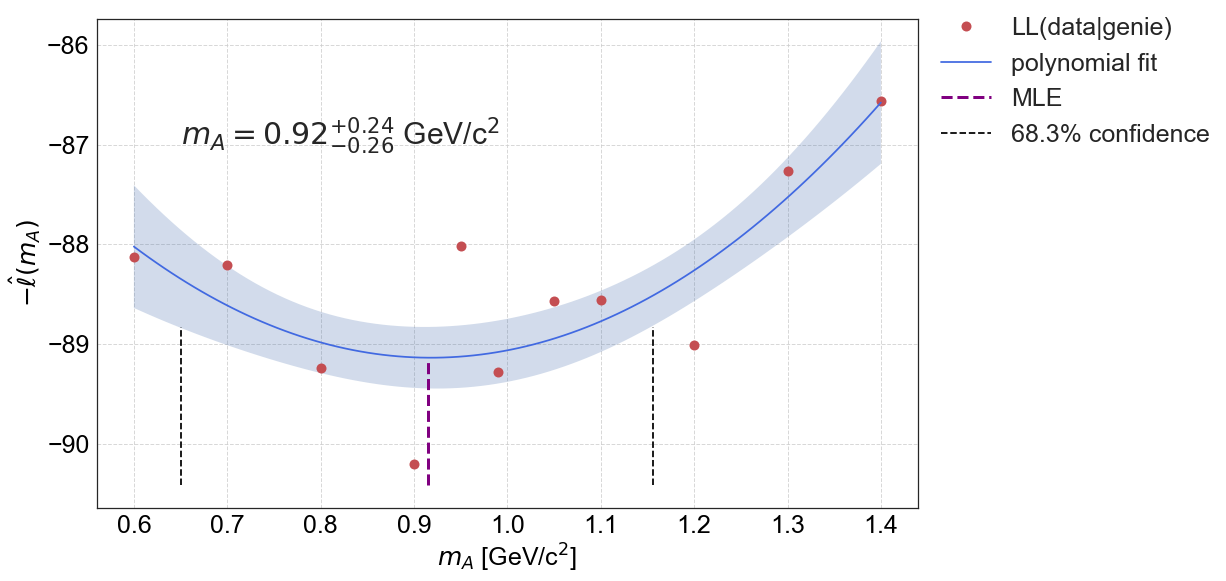

In [49]:
fig=plt.figure(figsize=(12.944,8)); ax=fig.add_subplot(1,1,1)
x,y = LL_df['mA'] , LL_df['-LL']
deg = 2 # degree of polynomial
p,cov = np.polyfit(x,y,deg=deg,cov=True)
poly = np.poly1d(p)    

plt.plot( x,y , 'ro',markersize=10,linewidth=2,label='LL(data|genie)')
x_poly = linspace(0.6,1.4,100)
plt.plot(x_poly,poly(x_poly),'-',color='royalblue',label='polynomial fit')    

# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([x_poly**(deg-i) for i in range(deg+1)]).T
Cov_poly = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
sig_poly = np.sqrt(np.diag(Cov_poly))  # Standard deviations are sqrt of diagonal
poly_up = np.poly1d(np.polyfit(x_poly,poly(x_poly)+sig_poly,deg=deg))
poly_dw = np.poly1d(np.polyfit(x_poly,poly(x_poly)-sig_poly,deg=deg))
ax.fill_between(x_poly, poly(x_poly)+sig_poly, poly(x_poly)-sig_poly, alpha=.25)

MLE = np.min(poly(x_poly))
x_MLE = find_x_poly(poly,MLE,xmin=0.6,xmax=1.4)

TT_x_MLE = np.vstack([np.array([x_MLE])**(deg-i) for i in range(deg+1)]).T
Cov_MLE = np.dot(TT_x_MLE, np.dot(cov, TT_x_MLE.T)) # C_y = TT*C_z*TT.T
sig_MLE = np.sqrt(np.diag(Cov_MLE))  # Standard deviations are sqrt of diagonal
MLE_top = MLE + sig_MLE

ymin = np.min(ax.get_ylim())
plt.plot([x_MLE,x_MLE],[ymin,MLE],'--',linewidth=3,color='purple',label='MLE')
MLE = poly(x_MLE)
x_MLE_dw = find_x_poly(poly_dw,MLE_top,xmin=0.6,xmax=x_MLE); x_MLE_dw_err = x_MLE - x_MLE_dw
x_MLE_up = find_x_poly(poly_dw,MLE_top,xmin=x_MLE,xmax=1.4); x_MLE_up_err = x_MLE_up - x_MLE
plt.plot(        
        [x_MLE_dw,x_MLE_dw],[ymin,MLE_top],'--'
        ,[x_MLE_up,x_MLE_up],[ymin,MLE_top],'--'
#         ,[x_MLE_dw,x_MLE_up],[MLE_top,MLE_top],'-'
        ,color='black',label='68.3% confidence')
set_axes(ax,r'$m_A$ [GeV/c$^2$]','$-{\hat {\ell }}(m_{A})$',do_add_grid=True)
plt.text(x_MLE_dw,-87,r'$m_A=%.2f^{+%.2f}_{-%.2f}$ GeV/c$^2$'%(x_MLE,x_MLE_up_err,x_MLE_dw_err),fontsize=30)
leg=plt.legend(bbox_to_anchor=(1.0,1.05),loc=2,fontsize=25)
plt.tight_layout()
fig.savefig(figures_path+'quasidata_Likelihood_Q2.pdf', bbox_inches='tight') 
print 'saved',figures_path+'quasidata_Likelihood_Q2.pdf'

### now, what happens if we have 10 times more statistics?

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/quasidata/quasidata_Likelihood_Q2_morestats.pdf


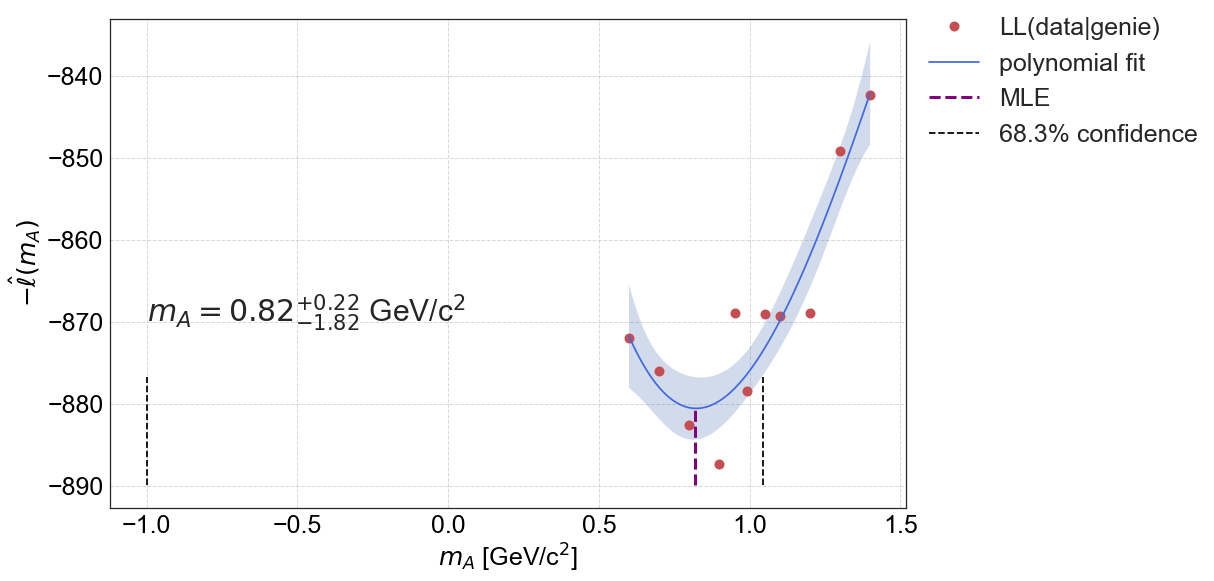

In [52]:
Nrand = 1820
quasidata_events = selected_CC1p0pi_tightFV.sample(n=Nrand)
var,x_label='Q2',r'$Q^2$ (GeV/c)$^2$'
Q2_cut = (0.1,0.6)
quasidata_in_cut = quasidata_events[(quasidata_events['reco_Q2'] > Q2_cut[0])                                         
                                    &(quasidata_events['reco_Q2'] < Q2_cut[1])]
debug=0
from superplot.statslib.kde import gaussian_kde
LL_df = pd.DataFrame(columns={'mA','LL'})
log_f_i=dict()
LLmax = -1000
for mA in mA_array:
    var_array = np.array(genie_CC1p0pi[mA]['Q2'])
    weights = np.array(genie_CC1p0pi[mA]['MicroBooNEWeight_Pmu_theta_Pp_theta'])
    pdf = gaussian_kde(var_array,weights=weights)
    f = pdf(quasidata_in_cut['reco_Q2'])    
    LL = np.sum(np.log(f))    
    if LL>LLmax: LLmax=LL    
    LL_df = LL_df.append(pd.DataFrame({'mA':mA,'LL':LL,'LL/n':LL/len(f),'-LL':-LL},index=[mA]))    
    if debug:
        print 'np.min(f):',np.min(f)
        print 'np.min(np.log(f)):',np.min(np.log(f)),'np.max(np.log(f)):',np.max(np.log(f))
        print 'LL:',LL
LL_df['-ln(L/Lmax)'] = -(LL_df['LL']-LLmax)
fig=plt.figure(figsize=(12.944,8)); ax=fig.add_subplot(1,1,1)
x,y = LL_df['mA'] , LL_df['-LL']
deg = 3 # degree of polynomial
p,cov = np.polyfit(x,y,deg=deg,cov=True)
poly = np.poly1d(p)    

plt.plot( x,y , 'ro',markersize=10,linewidth=2,label='LL(data|genie)')
x_poly = linspace(0.6,1.4,100)
plt.plot(x_poly,poly(x_poly),'-',color='royalblue',label='polynomial fit')    

# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([x_poly**(deg-i) for i in range(deg+1)]).T
Cov_poly = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
sig_poly = np.sqrt(np.diag(Cov_poly))  # Standard deviations are sqrt of diagonal
poly_up = np.poly1d(np.polyfit(x_poly,poly(x_poly)+sig_poly,deg=deg))
poly_dw = np.poly1d(np.polyfit(x_poly,poly(x_poly)-sig_poly,deg=deg))
ax.fill_between(x_poly, poly(x_poly)+sig_poly, poly(x_poly)-sig_poly, alpha=.25)

MLE = np.min(poly(x_poly))
x_MLE = find_x_poly(poly,MLE,xmin=0.6,xmax=1.4)

TT_x_MLE = np.vstack([np.array([x_MLE])**(deg-i) for i in range(deg+1)]).T
Cov_MLE = np.dot(TT_x_MLE, np.dot(cov, TT_x_MLE.T)) # C_y = TT*C_z*TT.T
sig_MLE = np.sqrt(np.diag(Cov_MLE))  # Standard deviations are sqrt of diagonal
MLE_top = MLE + sig_MLE

ymin = np.min(ax.get_ylim())
plt.plot([x_MLE,x_MLE],[ymin,MLE],'--',linewidth=3,color='purple',label='MLE')
MLE = poly(x_MLE)
x_MLE_dw = find_x_poly(poly_dw,MLE_top,xmin=0.6,xmax=x_MLE); x_MLE_dw_err = x_MLE - x_MLE_dw
x_MLE_up = find_x_poly(poly_dw,MLE_top,xmin=x_MLE,xmax=1.4); x_MLE_up_err = x_MLE_up - x_MLE
plt.plot(        
        [x_MLE_dw,x_MLE_dw],[ymin,MLE_top],'--'
        ,[x_MLE_up,x_MLE_up],[ymin,MLE_top],'--'
#         ,[x_MLE_dw,x_MLE_up],[MLE_top,MLE_top],'-'
        ,color='black',label='68.3% confidence')
set_axes(ax,r'$m_A$ [GeV/c$^2$]','$-{\hat {\ell }}(m_{A})$',do_add_grid=True)
plt.text(x_MLE_dw,-870,r'$m_A=%.2f^{+%.2f}_{-%.2f}$ GeV/c$^2$'%(x_MLE,x_MLE_up_err,x_MLE_dw_err),fontsize=30)
leg=plt.legend(bbox_to_anchor=(1.0,1.05),loc=2,fontsize=25)
plt.tight_layout()
fig.savefig(figures_path+'quasidata_Likelihood_Q2_morestats.pdf', bbox_inches='tight') 
print 'saved',figures_path+'quasidata_Likelihood_Q2_morestats.pdf'

## secondly, sample 350 events from our standard FV region and run the likelihood test on $p_p$-distribution

In [55]:
Nrand = 350
quasidata_events = selected_CC1p0pi.sample(n=Nrand)

In [30]:
var,x_label='Pp',r'$p_p$ (GeV/c)'
Pp_cut = (0.2,0.9)
quasidata_in_cut = quasidata_events[(quasidata_events['reco_Pp'] > Pp_cut[0])
                                    &(quasidata_events['reco_Pp'] < Pp_cut[1])]

In [32]:
debug=0
LL_df = pd.DataFrame(columns={'mA','LL'})
LLmax = -1000
for mA in mA_array:
    var_array = np.array(genie_CC1p0pi[mA]['Pp'])
    weights = np.array(genie_CC1p0pi[mA]['MicroBooNEWeight_Pmu_theta_Pp_theta'])
    pdf = gaussian_kde(var_array,weights=weights)
    f = pdf(quasidata_in_cut['reco_Pp'])
    LL = np.sum(np.log(f))
    if LL>LLmax: LLmax=LL
    LL_df = LL_df.append(pd.DataFrame({'mA':mA,'LL':LL,'LL/n':LL/len(f),'-LL':-LL},index=[mA]))    
    if debug:
        print 'np.min(f):',np.min(f)
        print 'np.min(np.log(f)):',np.min(np.log(f)),'np.max(np.log(f)):',np.max(np.log(f))
        print 'LL:',LL
    # LL_df
LL_df['-ln(L/Lmax)'] = -(LL_df['LL']-LLmax)
print 'done'    

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/quasidata/Likelihood_Pp.pdf


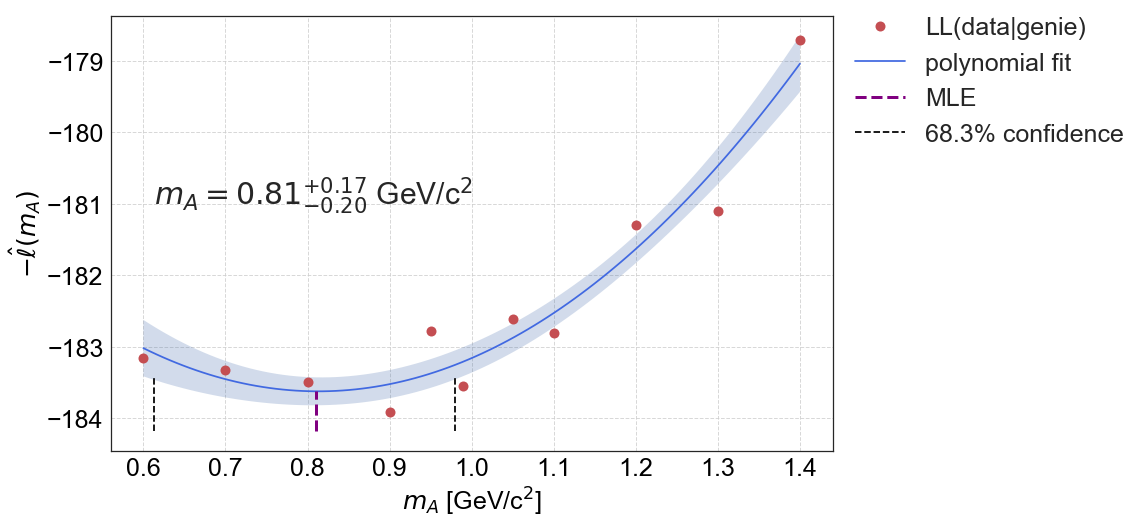

In [35]:
fig=plt.figure(figsize=(12.944,8)); ax=fig.add_subplot(1,1,1)
x,y = LL_df['mA'] , LL_df['-LL']
deg = 2 # degree of polynomial
p,cov = np.polyfit(x,y,deg=deg,cov=True)
poly = np.poly1d(p)    

plt.plot( x,y , 'ro',markersize=10,linewidth=2,label='LL(data|genie)')
x_poly = linspace(0.6,1.4,100)
plt.plot(x_poly,poly(x_poly),'-',color='royalblue',label='polynomial fit')    

# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([x_poly**(deg-i) for i in range(deg+1)]).T
Cov_poly = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
sig_poly = np.sqrt(np.diag(Cov_poly))  # Standard deviations are sqrt of diagonal
poly_up = np.poly1d(np.polyfit(x_poly,poly(x_poly)+sig_poly,deg=deg))
poly_dw = np.poly1d(np.polyfit(x_poly,poly(x_poly)-sig_poly,deg=deg))
ax.fill_between(x_poly, poly(x_poly)+sig_poly, poly(x_poly)-sig_poly, alpha=.25)

MLE = np.min(poly(x_poly))
x_MLE = find_x_poly(poly,MLE,xmin=0.6,xmax=1.4)

TT_x_MLE = np.vstack([np.array([x_MLE])**(deg-i) for i in range(deg+1)]).T
Cov_MLE = np.dot(TT_x_MLE, np.dot(cov, TT_x_MLE.T)) # C_y = TT*C_z*TT.T
sig_MLE = np.sqrt(np.diag(Cov_MLE))  # Standard deviations are sqrt of diagonal
MLE_top = MLE + sig_MLE

ymin = np.min(ax.get_ylim())
plt.plot([x_MLE,x_MLE],[ymin,MLE],'--',linewidth=3,color='purple',label='MLE')
MLE = poly(x_MLE)
x_MLE_dw = find_x_poly(poly_dw,MLE_top,xmin=0.6,xmax=x_MLE); x_MLE_dw_err = x_MLE - x_MLE_dw
x_MLE_up = find_x_poly(poly_dw,MLE_top,xmin=x_MLE,xmax=1.4); x_MLE_up_err = x_MLE_up - x_MLE
plt.plot(        
        [x_MLE_dw,x_MLE_dw],[ymin,MLE_top],'--'
        ,[x_MLE_up,x_MLE_up],[ymin,MLE_top],'--'
#         ,[x_MLE_dw,x_MLE_up],[MLE_top,MLE_top],'-'
        ,color='black',label='68.3% confidence')
set_axes(ax,r'$m_A$ [GeV/c$^2$]','$-{\hat {\ell }}(m_{A})$',do_add_grid=True)
plt.text(x_MLE_dw,-181,r'$m_A=%.2f^{+%.2f}_{-%.2f}$ GeV/c$^2$'%(x_MLE,x_MLE_up_err,x_MLE_dw_err),fontsize=30)
plt.legend(bbox_to_anchor=(1.0,1.05),loc=2,fontsize=25)
fig.savefig(figures_path+'quasidata_Likelihood_Pp.pdf', bbox_inches='tight') 
print 'saved',figures_path+'quasidata_Likelihood_Pp.pdf'

### now, what happens if we have 10 times more statistics?

done
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/quasidata/quasidata_Likelihood_Pp_morestats.pdf


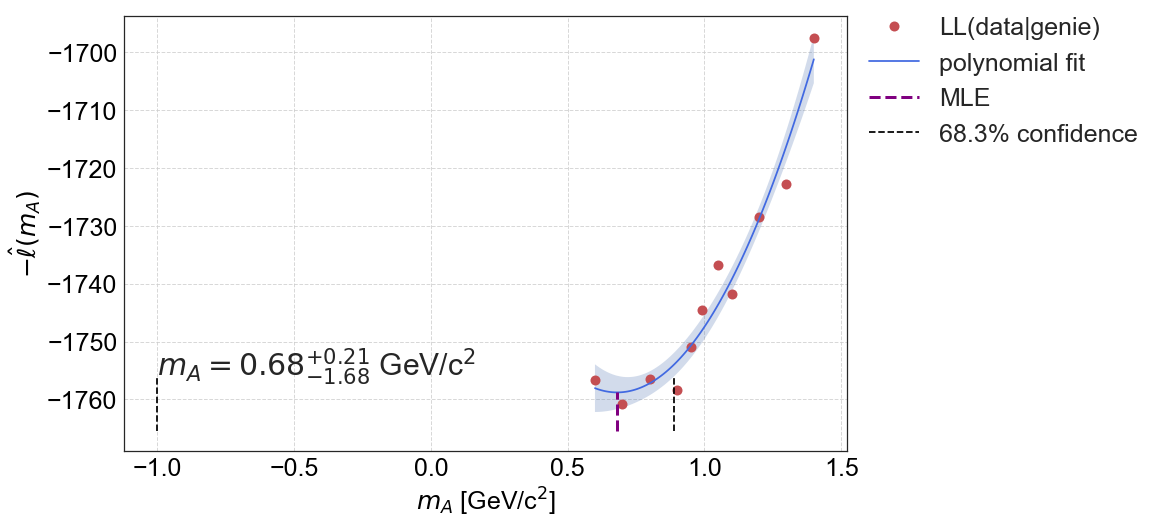

In [54]:
Nrand = 3500
quasidata_events = selected_CC1p0pi.sample(n=Nrand)
var,x_label='Pp',r'$p_p$ (GeV/c)'
Pp_cut = (0.2,0.9)
quasidata_in_cut = quasidata_events[(quasidata_events['reco_Pp'] > Pp_cut[0])
                                    &(quasidata_events['reco_Pp'] < Pp_cut[1])]
debug=0
LL_df = pd.DataFrame(columns={'mA','LL'})
LLmax = -1000
for mA in mA_array:
    var_array = np.array(genie_CC1p0pi[mA]['Pp'])
    weights = np.array(genie_CC1p0pi[mA]['MicroBooNEWeight_Pmu_theta_Pp_theta'])
    pdf = gaussian_kde(var_array,weights=weights)
    f = pdf(quasidata_in_cut['reco_Pp'])
    LL = np.sum(np.log(f))
    if LL>LLmax: LLmax=LL
    LL_df = LL_df.append(pd.DataFrame({'mA':mA,'LL':LL,'LL/n':LL/len(f),'-LL':-LL},index=[mA]))    
    if debug:
        print 'np.min(f):',np.min(f)
        print 'np.min(np.log(f)):',np.min(np.log(f)),'np.max(np.log(f)):',np.max(np.log(f))
        print 'LL:',LL
    # LL_df
LL_df['-ln(L/Lmax)'] = -(LL_df['LL']-LLmax)
print 'done'    
fig=plt.figure(figsize=(12.944,8)); ax=fig.add_subplot(1,1,1)
x,y = LL_df['mA'] , LL_df['-LL']
deg = 2 # degree of polynomial
p,cov = np.polyfit(x,y,deg=deg,cov=True)
poly = np.poly1d(p)    

plt.plot( x,y , 'ro',markersize=10,linewidth=2,label='LL(data|genie)')
x_poly = linspace(0.6,1.4,100)
plt.plot(x_poly,poly(x_poly),'-',color='royalblue',label='polynomial fit')    

# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([x_poly**(deg-i) for i in range(deg+1)]).T
Cov_poly = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
sig_poly = np.sqrt(np.diag(Cov_poly))  # Standard deviations are sqrt of diagonal
poly_up = np.poly1d(np.polyfit(x_poly,poly(x_poly)+sig_poly,deg=deg))
poly_dw = np.poly1d(np.polyfit(x_poly,poly(x_poly)-sig_poly,deg=deg))
ax.fill_between(x_poly, poly(x_poly)+sig_poly, poly(x_poly)-sig_poly, alpha=.25)

MLE = np.min(poly(x_poly))
x_MLE = find_x_poly(poly,MLE,xmin=0.6,xmax=1.4)

TT_x_MLE = np.vstack([np.array([x_MLE])**(deg-i) for i in range(deg+1)]).T
Cov_MLE = np.dot(TT_x_MLE, np.dot(cov, TT_x_MLE.T)) # C_y = TT*C_z*TT.T
sig_MLE = np.sqrt(np.diag(Cov_MLE))  # Standard deviations are sqrt of diagonal
MLE_top = MLE + sig_MLE

ymin = np.min(ax.get_ylim())
plt.plot([x_MLE,x_MLE],[ymin,MLE],'--',linewidth=3,color='purple',label='MLE')
MLE = poly(x_MLE)
x_MLE_dw = find_x_poly(poly_dw,MLE_top,xmin=0.6,xmax=x_MLE); x_MLE_dw_err = x_MLE - x_MLE_dw
x_MLE_up = find_x_poly(poly_dw,MLE_top,xmin=x_MLE,xmax=1.4); x_MLE_up_err = x_MLE_up - x_MLE
plt.plot(        
        [x_MLE_dw,x_MLE_dw],[ymin,MLE_top],'--'
        ,[x_MLE_up,x_MLE_up],[ymin,MLE_top],'--'
#         ,[x_MLE_dw,x_MLE_up],[MLE_top,MLE_top],'-'
        ,color='black',label='68.3% confidence')
set_axes(ax,r'$m_A$ [GeV/c$^2$]','$-{\hat {\ell }}(m_{A})$',do_add_grid=True)
plt.text(x_MLE_dw,MLE+3,r'$m_A=%.2f^{+%.2f}_{-%.2f}$ GeV/c$^2$'%(x_MLE,x_MLE_up_err,x_MLE_dw_err),fontsize=30)
plt.legend(bbox_to_anchor=(1.0,1.05),loc=2,fontsize=25)
fig.savefig(figures_path+'quasidata_Likelihood_Pp_morestats.pdf', bbox_inches='tight') 
print 'saved',figures_path+'quasidata_Likelihood_Pp_morestats.pdf'